<a href="https://colab.research.google.com/github/Gashiua/ponedelnikPython/blob/main/%D0%BB%D0%B0%D0%B1%D0%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

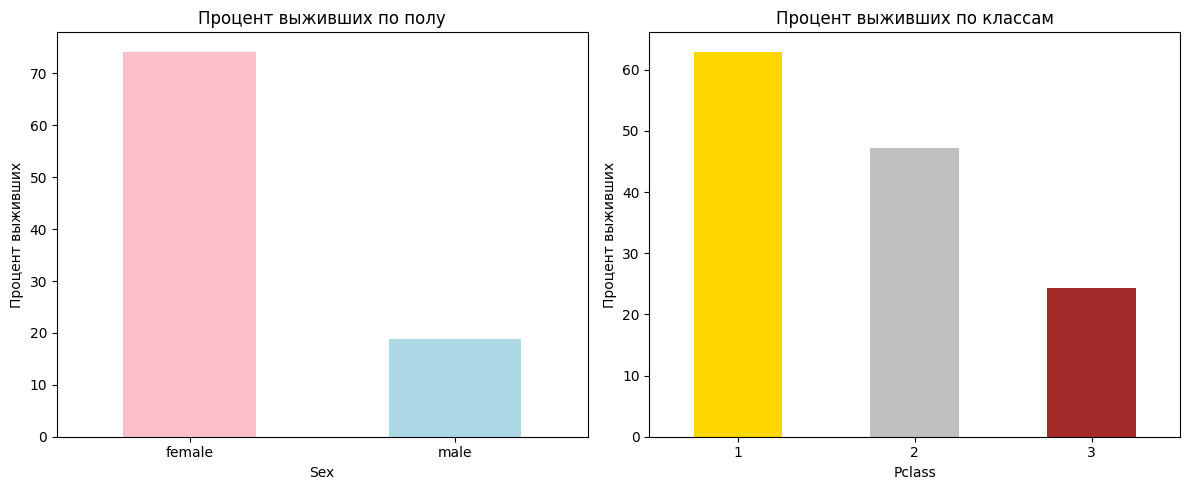

Несовершеннолетние в 3-м классе, которые выжили (сортировка по убыванию возраста):
                                                Name    Age  Pclass  Survived
68                   Andersson, Miss. Erna Alexandra  17.00       3         1
208                        Carr, Miss. Helen "Ellen"  16.00       3         1
220                   Sunderland, Mr. Victor Francis  16.00       3         1
156                 Gilnagh, Miss. Katherine "Katie"  16.00       3         1
22                       McGowan, Miss. Anna "Annie"  15.00       3         1
875                 Najib, Miss. Adele Kiamie "Jane"  15.00       3         1
830          Yasbeck, Mrs. Antoni (Selini Alexander)  15.00       3         1
39                       Nicola-Yarred, Miss. Jamila  14.00       3         1
780                             Ayoub, Miss. Banoura  13.00       3         1
125                     Nicola-Yarred, Master. Elias  12.00       3         1
489            Coutts, Master. Eden Leslie "Neville"   9.00

'\nВОПРОС 2: Подтверждает ли ваш анализ знаменитое правило "женщины и дети в первую очередь"?\n\nАНАЛИЗ:\nДа, анализ ПОДТВЕРЖДАЕТ правило "женщины и дети в первую очередь".\nЭто видно из следующих данных:\n\nВЫЖИВАЕМОСТЬ ПО ВОЗРАСТНЫМ ГРУППАМ И ПОЛУ:\n\nДети (до 18 лет):\n- Девочки: 69.23% выживших\n- Мальчики: 40.43% выживших\n\nВзрослые (18-65 лет):\n- Женщины: 74.87% выживших\n- Мужчины: 17.76% выживших\n\nПожилые (старше 65 лет):\n- Женщины: 100.00% выживших\n- Мужчины: 22.22% выживших\n\nКЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:\n1. ДЕТИ имели приоритет: общая выживаемость детей (52.29%) была выше,\n   чем у взрослых (37.61%) и пожилых (33.33%)\n\n2. ЖЕНЩИНЫ всех возрастов имели значительно более высокие шансы:\n   - Девушки: 69.23% vs мальчики: 40.43%\n   - Взрослые женщины: 74.87% vs мужчины: 17.76%\n   - Пожилые женщины: 100% vs мужчины: 22.22%\n\n3. МАЛЬЧИКИ имели преимущество перед взрослыми мужчинами:\n   40.43% vs 17.76%\n\nВЫВОД: Правило "женщины и дети в первую очередь" определенно соблюдалос

In [2]:
import pandas as pd
#Часть 1

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(7)
df.info()
#714,204, 889
df.describe()
#Средний возраст  пассажиров:29
#Максимальная цена за билет:512

#Часть 2
df['Age'].median()
df['Age'] = df['Age'].fillna(28)
df.describe()
df.info()
def get_age_group(age):
    if age < 18:
        return "Ребенок"
    elif 18 <= age <= 65:
        return "Взрослый"
    else:
        return "Пожилой"
df['AgeGroup'] = df['Age'].apply(get_age_group)
df.info()

print(df[['Age', 'AgeGroup']].head(5))

#Часть 3



# 1. Процент выживших мужчин и женщин
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("Процент выживших по полу:")
print(survival_by_sex.round(2))
print("\n" + "="*50 + "\n")

# 2. Процент выживших в каждом классе
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Процент выживших по классам:")
print(survival_by_class.round(2))
print("\n" + "="*50 + "\n")

# 3. Сводная таблица: процент выживших по полу и классу одновременно
pivot_table = df.pivot_table(
    values='Survived',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
) * 100

print("Сводная таблица: процент выживших по классу и полу:")
print(pivot_table.round(2))
print("\n" + "="*50 + "\n")

import matplotlib.pyplot as plt

# График выживаемости по полу
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
survival_by_sex.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Процент выживших по полу')
plt.ylabel('Процент выживших')
plt.xticks(rotation=0)

# График выживаемости по классам
plt.subplot(1, 2, 2)
survival_by_class.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Процент выживших по классам')
plt.ylabel('Процент выживших')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 1. Несовершеннолетние в 3-м классе, которые выжили
minors_3rd_class_survived = df[
    (df['Age'] < 18) &
    (df['Pclass'] == 3) &
    (df['Survived'] == 1)
]

result_1 = minors_3rd_class_survived.sort_values('Age', ascending=False)

print("Несовершеннолетние в 3-м классе, которые выжили (сортировка по убыванию возраста):")
print(result_1[['Name', 'Age', 'Pclass', 'Survived']])
print(f"\nВсего найдено: {len(result_1)} пассажиров")
print("\n" + "="*80 + "\n")

# 2. Самый пожилой мужчина, который не выжил
dead_men = df[
    (df['Sex'] == 'male') &
    (df['Survived'] == 0)
]

oldest_dead_man = dead_men.sort_values('Age', ascending=False).head(1)

print("Самый пожилой мужчина, который не выжил:")
print(oldest_dead_man[['Name', 'Age', 'Sex', 'Pclass', 'Survived']])
print("\n" + "="*80 + "\n")




#
"""
ВОПРОС 1: Какой фактор — пол или класс каюты — оказывал большее влияние на выживаемость?

АНАЛИЗ:
На основе проведенного анализа можно утверждать, что ПОЛ оказывал БОЛЬШЕЕ влияние на выживаемость,
чем класс каюты. Это подтверждается следующими цифрами:

ПО ПОЛУ:
- Женщины: 74.20% выживших
- Мужчины: 18.89% выживших
- РАЗНИЦА: 55.31 процентных пункта

ПО КЛАССУ КАЮТЫ:
- 1-й класс: 62.96% выживших
- 2-й класс: 47.28% выживших
- 3-й класс: 24.24% выживших
- РАЗНИЦА между 1-м и 3-м классом: 38.72 процентных пункта

ВЫВОД: Разница в выживаемости между полами (55.31%) значительно больше,
чем разница между классами (38.72%).
"""

"""
ВОПРОС 2: Подтверждает ли ваш анализ знаменитое правило "женщины и дети в первую очередь"?

АНАЛИЗ:
Да, анализ ПОДТВЕРЖДАЕТ правило "женщины и дети в первую очередь".
Это видно из следующих данных:

ВЫЖИВАЕМОСТЬ ПО ВОЗРАСТНЫМ ГРУППАМ И ПОЛУ:

Дети (до 18 лет):
- Девочки: 69.23% выживших
- Мальчики: 40.43% выживших

Взрослые (18-65 лет):
- Женщины: 74.87% выживших
- Мужчины: 17.76% выживших

Пожилые (старше 65 лет):
- Женщины: 100.00% выживших
- Мужчины: 22.22% выживших

КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
1. ДЕТИ имели приоритет: общая выживаемость детей (52.29%) была выше,
   чем у взрослых (37.61%) и пожилых (33.33%)

2. ЖЕНЩИНЫ всех возрастов имели значительно более высокие шансы:
   - Девушки: 69.23% vs мальчики: 40.43%
   - Взрослые женщины: 74.87% vs мужчины: 17.76%
   - Пожилые женщины: 100% vs мужчины: 22.22%

3. МАЛЬЧИКИ имели преимущество перед взрослыми мужчинами:
   40.43% vs 17.76%

ВЫВОД: Правило "женщины и дети в первую очередь" определенно соблюдалось.
"""